In [81]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [105]:
src1 = cv.imread('paisaje_foto.jpeg')
src2 = cv.imread('paisaje_texto.jpeg')


Text(0.5, 1.0, 'Paisaje-text')

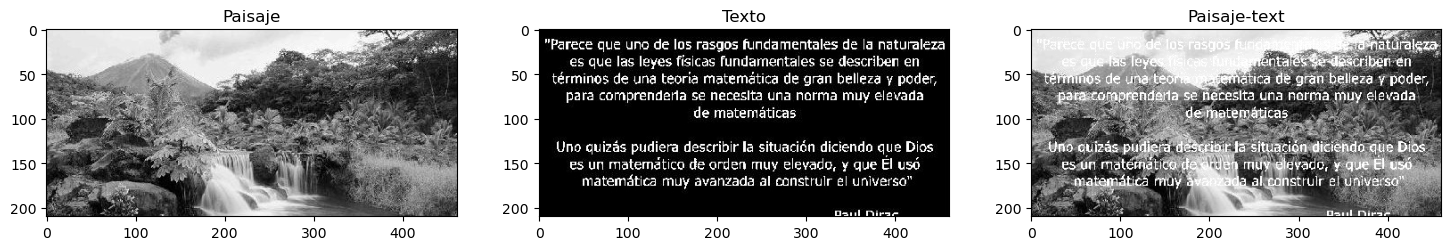

In [114]:
img_texto = cv.cvtColor(src2,cv.COLOR_BGR2GRAY)
img_paisaje = cv.cvtColor(src1,cv.COLOR_BGR2GRAY)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

img_paisaje_text = cv.bitwise_or(img_paisaje, img_texto)

ax1.imshow(img_paisaje, cmap="gray")
ax1.set_title("Paisaje")
ax2.imshow(img_texto, cmap="gray")
ax2.set_title("Texto")
ax3.imshow(img_paisaje_text, cmap="gray")
ax3.set_title("Paisaje-text")

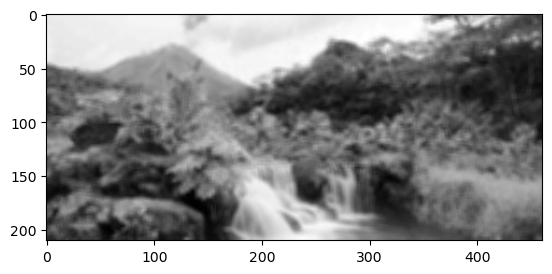

In [132]:
#Hacemos uso del desenfoque gausiano para desenfocar la imagen
paisaje_letras_difuminado = cv.GaussianBlur(src=img_paisaje_text, ksize=(5,5), sigmaX=300, sigmaY=0)
fig, ax1 = plt.subplots(1,1)
ax1.imshow(paisaje_letras_difuminado,cmap="gray")


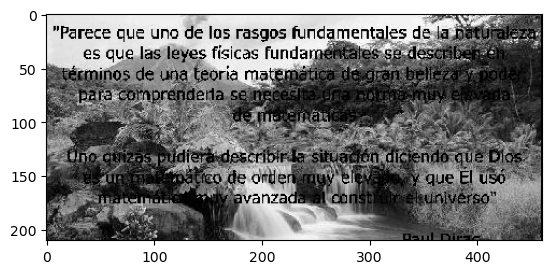

In [96]:
#Hacemos un not a el texto(mascara) para sacar las letras de la imagen
img_texto_not = cv.bitwise_not(img_texto)
#Ahora las juntamos para tener un paisaje con las letras en negro
img_paisaje_text_and = cv.bitwise_and(img_texto_not,img_paisaje_text)

fig, ax1 = plt.subplots(1,1)
ax1.imshow(img_paisaje_text_and,cmap="gray")

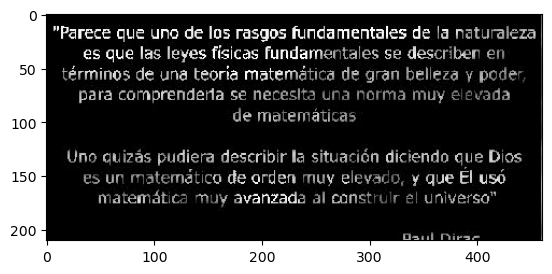

In [103]:
#Ahora sacamos las letras difuminadas
letras_difuminadas = cv.bitwise_and(paisaje_letras_difuminado,img_texto)
fig, ax1 = plt.subplots(1,1)
ax1.imshow(letras_difuminadas,cmap="gray")

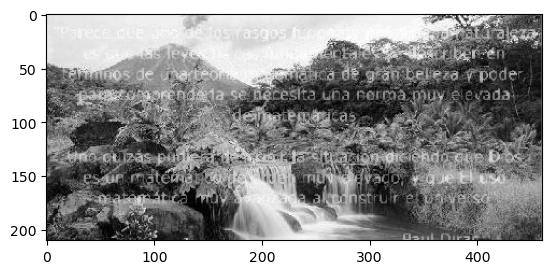

In [104]:
#Hacemos un or de la imagen con las letras en negro y la imagen de las letras difuminadas
paisaje_restaurado = cv.bitwise_or(img_paisaje_text_and,letras_difuminadas)
fig, ax1 = plt.subplots(1,1)
ax1.imshow(paisaje_restaurado,cmap="gray")

### Hacemos un bucle con los pasos anteriores

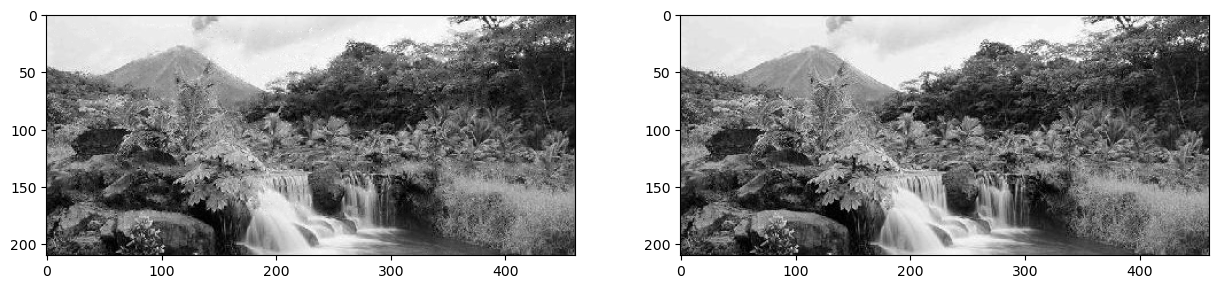

In [139]:
img_texto = cv.cvtColor(src2,cv.COLOR_BGR2GRAY)
img_paisaje = cv.cvtColor(src1,cv.COLOR_BGR2GRAY)

img_paisaje_text = cv.bitwise_or(img_paisaje, img_texto)

global paisaje_restaurado
for _ in range(10):

    paisaje_letras_difuminado = cv.GaussianBlur(src=img_paisaje_text, ksize=(5,5), sigmaX=300, sigmaY=100)
    
    letras_difuminadas = cv.bitwise_and(paisaje_letras_difuminado,img_texto)

    img_texto_not = cv.bitwise_not(img_texto)
    img_paisaje_text_and = cv.bitwise_and(img_texto_not,img_paisaje_text)

    paisaje_restaurado = cv.bitwise_or(img_paisaje_text_and,letras_difuminadas)
    
    img_paisaje_text = paisaje_restaurado.copy()

fig , (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.imshow(paisaje_restaurado,cmap="gray")
ax2.imshow(img_paisaje,cmap="gray")
